In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


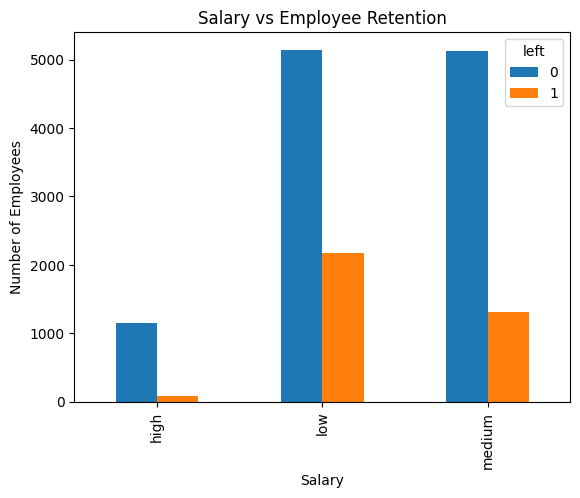

In [3]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.title("Salary vs Employee Retention")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()

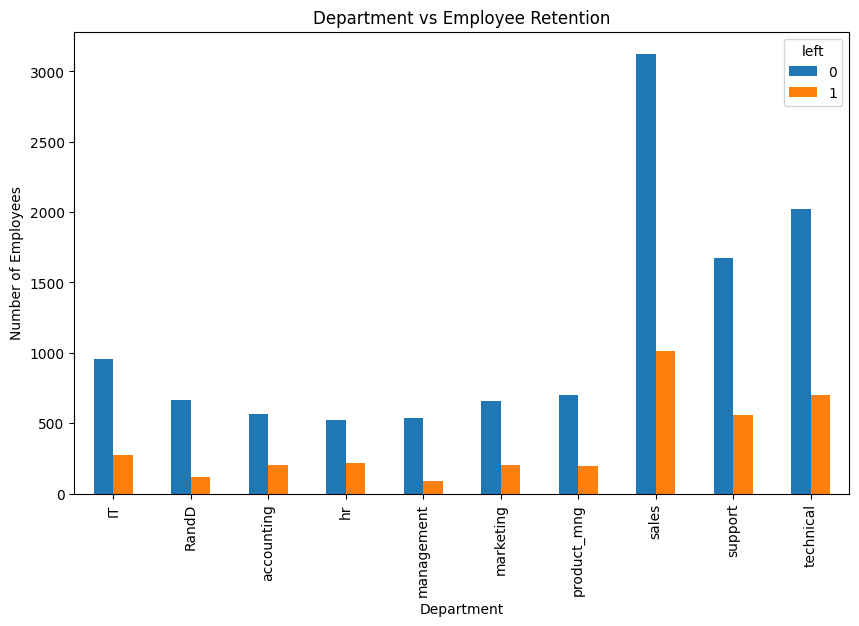

In [4]:
pd.crosstab(df.Department, df.left).plot(kind='bar', figsize=(10,6))
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

In [5]:
df = df[['satisfaction_level',
         'average_montly_hours',
         'promotion_last_5years',
         'salary',
         'left']]

In [6]:
df = pd.get_dummies(df, columns=['salary'], drop_first=True)
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium
0,0.38,157,0,1,True,False
1,0.80,262,0,1,False,True
2,0.11,272,0,1,False,True
3,0.72,223,0,1,True,False
4,0.37,159,0,1,True,False


In [7]:
X = df.drop('left', axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.762


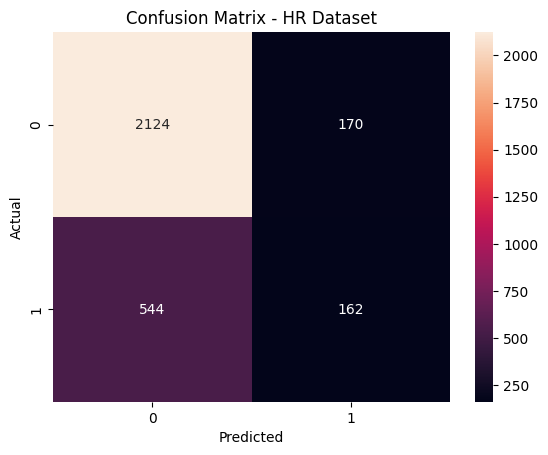

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.49      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000



In [10]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - HR Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
zoo = pd.read_csv("zoo-data.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
zoo = zoo.drop('animal_name', axis=1)

In [14]:
X = zoo.drop('class_type', axis=1)
y = zoo['class_type']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


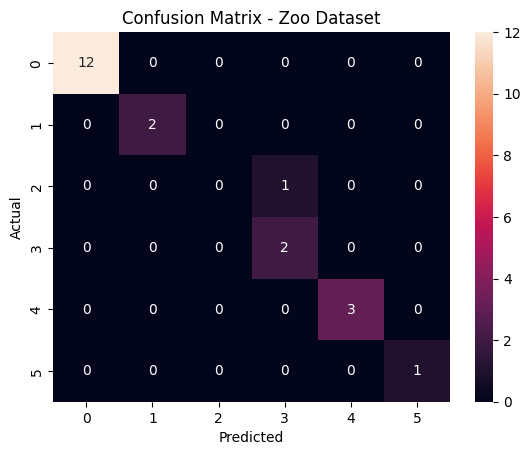

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Zoo Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("HR_comma_sep.csv")
print(df.head())
print(df.info())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [21]:
df = pd.get_dummies(df, columns=['salary'], drop_first=True)

X = df[['satisfaction_level', 'average_montly_hours',
        'promotion_last_5years', 'salary_low', 'salary_medium']].values

y = df['left'].values

In [24]:
X = np.array(X, dtype=float)
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [25]:
X = np.c_[np.ones(X.shape[0]), X]

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
def train(X, y, lr=0.01, epochs=1000):
    weights = np.zeros(X.shape[1])

    for _ in range(epochs):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / y.size
        weights -= lr * gradient

    return weights

weights = train(X, y)

In [28]:
def predict(X, weights):
    probs = sigmoid(np.dot(X, weights))
    return [1 if p >= 0.5 else 0 for p in probs]

y_pred = predict(X, weights)

In [29]:
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 78.45189679311954 %
